In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import the EDA functions I've built in a Python script
import eda

In [2]:
# # increase the number of characters shown for each column
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Import train/test

In [3]:
train = pd.read_csv('assets/train.csv', parse_dates=['Date'])

train.Block = train.Block.astype('category')
    
eda.eda(train)

Head of the dataframe:

        Date                                             Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
2 2007-05-29   6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29     7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29     7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS    41   N OAK PARK AVE  T002   
1          CULEX RESTUANS    41   N OAK PARK AVE  T002   
2          CULEX RESTUANS    62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS    79     W FOSTER AVE  T015   
4          CULEX RESTUANS    79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991  

In [4]:
test = pd.read_csv('assets/test.csv', parse_dates=['Date'], index_col='Id')

test.Block = test.Block.astype('category')
    
eda.eda(test)

Head of the dataframe:

         Date                                             Address  \
Id                                                                  
1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634, USA   

                   Species Block           Street  Trap  \
Id                                                        
1   CULEX PIPIENS/RESTUANS    41   N OAK PARK AVE  T002   
2           CULEX RESTUANS    41   N OAK PARK AVE  T002   
3            CULEX PIPIENS    41   N OAK PARK AVE  T002   
4         CULEX SALINARIUS    41   N OAK PARK AVE  T002   
5          CULEX TERRITANS    41   N OAK PARK AVE  T002   

               AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  


## Cursory look at `test.Species`

In [5]:
test.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [6]:
# What's the proportion of data has unspecified species in test?
test.Species.value_counts() / len(test)

CULEX PIPIENS/RESTUANS    0.132072
CULEX RESTUANS            0.126147
CULEX PIPIENS             0.124866
CULEX SALINARIUS          0.123438
CULEX TERRITANS           0.123404
CULEX TARSALIS            0.123369
UNSPECIFIED CULEX         0.123352
CULEX ERRATICUS           0.123352
Name: Species, dtype: float64

## Species distribution in train

### Overall distribution

In [7]:
num_mos_agg = train.groupby('Species')['NumMosquitos'].sum()
num_mos_agg

Species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: NumMosquitos, dtype: int64

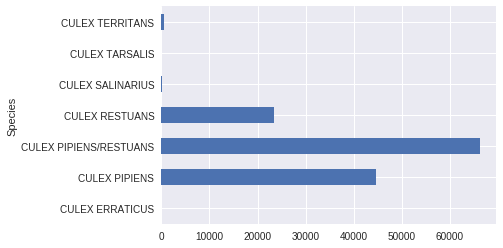

In [8]:
num_mos_agg.plot(kind='barh');

In [9]:
total_mos = train.NumMosquitos.sum()
total_mos == num_mos_agg.sum()

True

In [10]:
train['Month'] = train.Date.dt.month

In [11]:
num_mos_agg_month = train.groupby(['Month', 'Species'])['NumMosquitos'].sum()
# num_mos_agg_month = num_mos_agg_month.reset_index(level='Species')
num_mos_agg_month

Month  Species               
5      CULEX PIPIENS                 4
       CULEX PIPIENS/RESTUANS      114
       CULEX RESTUANS              112
6      CULEX PIPIENS               249
       CULEX PIPIENS/RESTUANS     9275
       CULEX RESTUANS             6970
       CULEX SALINARIUS             47
       CULEX TERRITANS              37
7      CULEX PIPIENS              4106
       CULEX PIPIENS/RESTUANS    20913
       CULEX RESTUANS            12101
       CULEX SALINARIUS             38
       CULEX TERRITANS              90
8      CULEX PIPIENS             29728
       CULEX PIPIENS/RESTUANS    24992
       CULEX RESTUANS             2975
       CULEX SALINARIUS             40
       CULEX TARSALIS                1
       CULEX TERRITANS             300
9      CULEX ERRATICUS               7
       CULEX PIPIENS              9707
       CULEX PIPIENS/RESTUANS    10012
       CULEX RESTUANS             1218
       CULEX SALINARIUS             19
       CULEX TARSALIS             

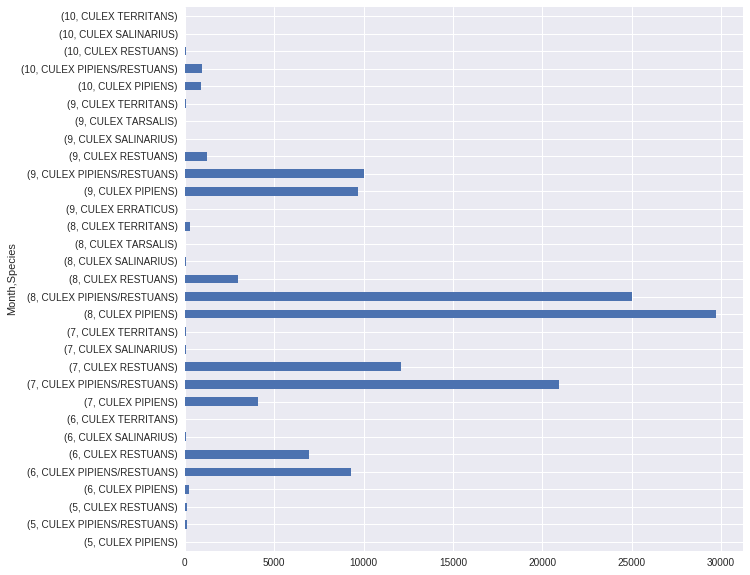

In [12]:
num_mos_agg_month.plot(kind='barh', figsize=(10, 10));

#### Looks like the distributions vary by month. But for the first pass, I'll just use the overall distribution.

In [14]:
species_prob = (num_mos_agg / total_mos).reset_index()
species_prob.rename(columns={'NumMosquitos': 'probability'}, inplace=True)
species_prob

,Species,probability
0,CULEX ERRATICUS,0.000052
1,CULEX PIPIENS,0.330801
2,CULEX PIPIENS/RESTUANS,0.490732
3,CULEX RESTUANS,0.173513
4,CULEX SALINARIUS,0.001074
5,CULEX TARSALIS,0.000052
6,CULEX TERRITANS,0.003777


In [15]:
unspecified = {'Species_' + row[0]: row[1] for index, row in species_prob.iterrows()}
unspecified

{'Species_CULEX ERRATICUS': 5.1836876754122885e-05,
 'Species_CULEX PIPIENS': 0.33080073164048907,
 'Species_CULEX PIPIENS/RESTUANS': 0.4907323069631736,
 'Species_CULEX RESTUANS': 0.17351283703226475,
 'Species_CULEX SALINARIUS': 0.0010737638756211168,
 'Species_CULEX TARSALIS': 5.1836876754122885e-05,
 'Species_CULEX TERRITANS': 0.0037766867349432387}